In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
plt.style.use('fivethirtyeight')


Create the DataFrame

In [2]:
dataframe = pd.read_csv("Zomato data.csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


**Data Cleaning**

Convert the data type of column - rate

In [4]:
def handelRate(value):
    value = str(value).split('/')
    value = value[0];
    return float (value)

dataframe['rate'] = dataframe['rate'].apply(handelRate)




In [5]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Checking if the dataset has null values??**

In [7]:
dataframe.isnull().sum().sum()

0

**Types of Resturant**

Text(0.5, 0, 'Types of Restaurants')

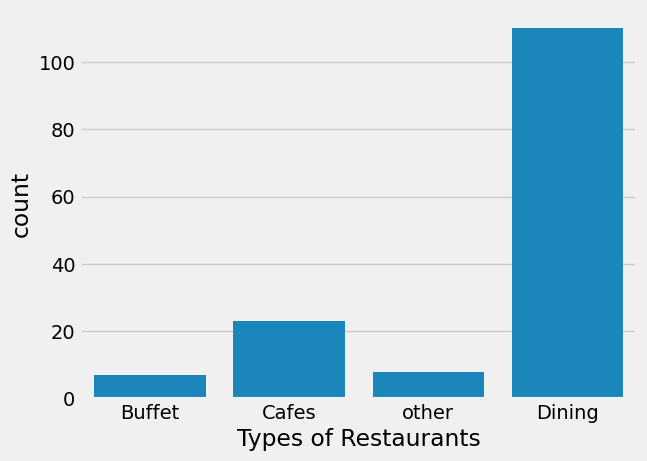

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Types of Restaurants")

**Observation** - So, The majority of the restaurant falls in dinning category

**Each type of restaurant has received total votes**

Text(0, 0.5, 'votes')

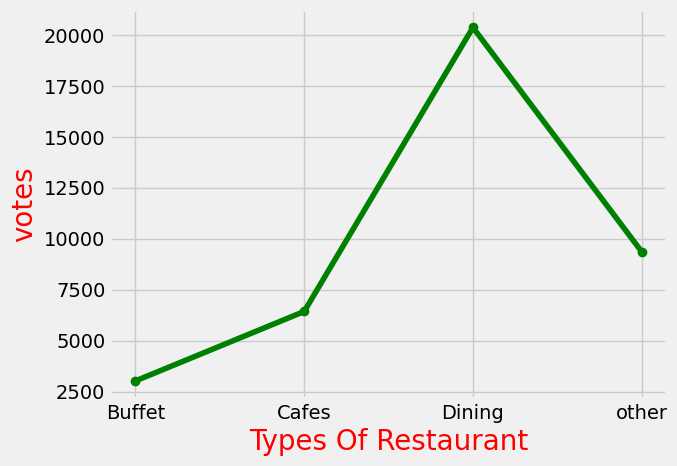

In [9]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker ='o')
plt.xlabel("Types Of Restaurant", c= "red", size= 20)
plt.ylabel("votes", c= "red", size= 20)
                                 

**Observation** - So, we seen Dinning restaurant has received maximum votes

**The majority of restaurants have received rating**

Text(0.5, 1.0, 'Rating Distribution')

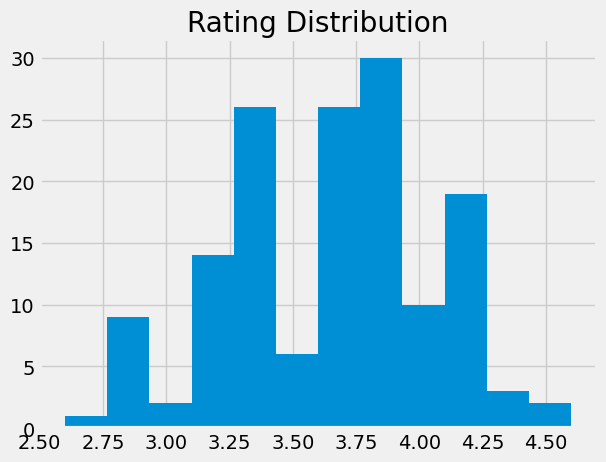

In [10]:
plt.hist(dataframe['rate'],bins= 12)
plt.title("Rating Distribution")
#plt.show()

**Observation** - So, The majority of restaurants received rating between 3.5 to 4

**Most couple expence over the online order**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

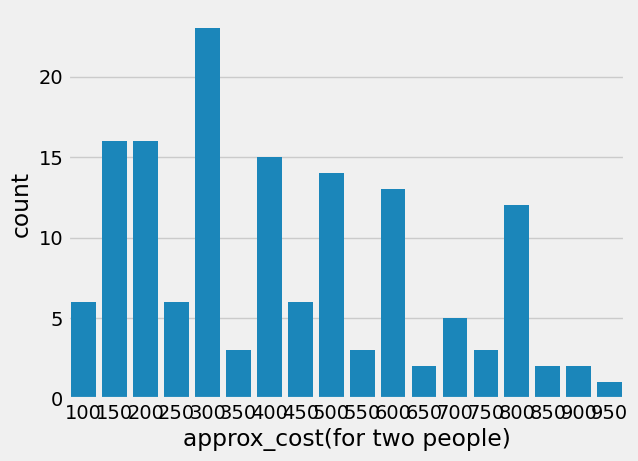

In [23]:
couple_data = dataframe['approx_cost(for two people)'] 
sns.countplot(x= couple_data)


**Observation** - So, The majority of couple prefer restaurant with an approximate cost of 300 rupees

**Proportion Of Online and Offline Order**

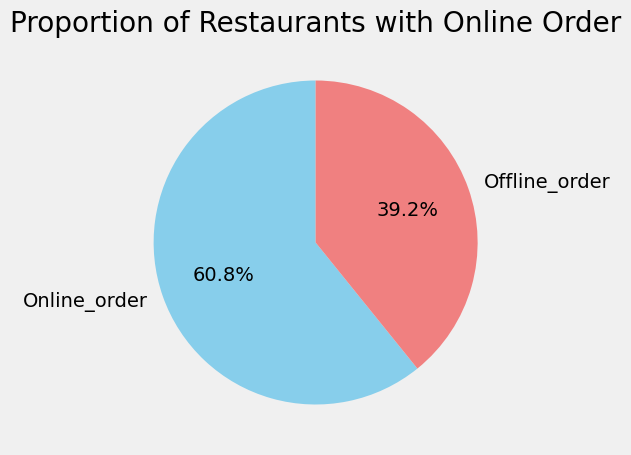

In [13]:
#pie chart or online order proportion

online_order_count= dataframe['online_order'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(online_order_count, labels=['Online_order', 'Offline_order'],
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Restaurants with Online Order')
plt.show()

**Observation** Most people are prefer online_order rather than Offline_order

**Received the maximum rating (Online/Offline)**

<Axes: xlabel='online_order', ylabel='rate'>

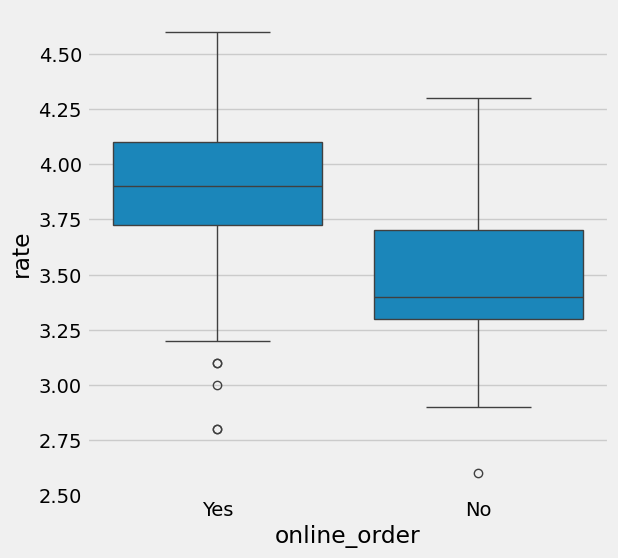

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order', y='rate', data= dataframe)

**Observation** - So, Offline order received lower rating in comparison to online  order

**The restaurants received Online / Offline orders**

In [15]:
# Create a colormap with red, yellow, and green
cmap = colors.LinearSegmentedColormap.from_list("", ["yellow", "violet", "green"])


Text(21.78333333333333, 0.5, 'Listed_in(type)')

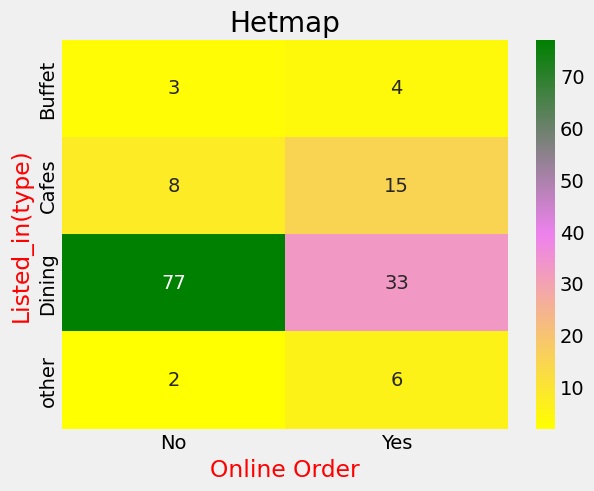

In [16]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0 )
sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt='d')
plt.title("Hetmap")
plt.xlabel("Online Order", c ="red")
plt.ylabel("Listed_in(type)", c="red")

**Observation** - Dining restaurants primarily accept offline order, Whereas cafes primarily receive online order. This suggests that clients prefeared order in person at restaurants, but prefer online orderig at cafes.